# Simpeg 2D inversion Using MTpy-v2 tools

This is an example of how to use MTpy-v2 tools to integrate with Simpeg to build an inversion.  

The recipe in MTpy-v2 is to create a quadree mesh from the given data, then invert the data using computed data errors




In [1]:
import numpy as np
from mtpy_data import FWD_NE_FAULTS_PROFILE_LIST

from mtpy import MTData
from mtpy.modeling.simpeg.recipes import Simpeg2D

## Load in data

We are going to load in data from a synthetic model that has some northeast trending faults in the upper 5 km.  The data were modeled to be in Australia which is why the EPSG is 4462 (the UTM datum for all of Australia).  The data are already in a profile, but we will demonstrate how to extract a profile line from the data by using the end points (usually in lat, lon).  The data are modeled from 3E-4 to 1E+3.

Steps:

 1) Read in EDI files into an MTData object
 2) Project station locations onto a UTM grid (EPSG = 4462)
 3) Extract the profile
 4) Interpolate onto a common period map
 5) Compute data errors for modeling (usually set an error floor)

In [2]:
# 1) load in data to an MTData object
md = MTData()
md.add_station([FWD_NE_FAULTS_PROFILE_LIST[index] for index in range(0, len(FWD_NE_FAULTS_PROFILE_LIST), 3)])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2652660100.py, line 3)

In [ ]:
# 2) Set UTM Grid
md.utm_epsg = 4426

24:08:26T17:41:52 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/12/2408/3636


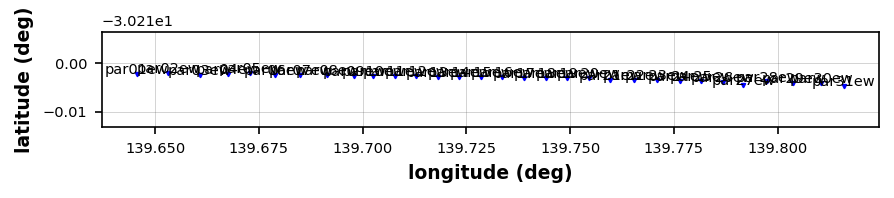

In [ ]:
# 2a) plot stations
station_plot = md.plot_stations()

In [ ]:
# 3) extract profile
profile = md.get_profile(139.50, -30.211997, 139.9, -30.214724527777776, 5000)

24:08:26T17:41:57 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because Tile URL resulted in a 404 error. Double-check your tile url:
https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/12/2408/3636


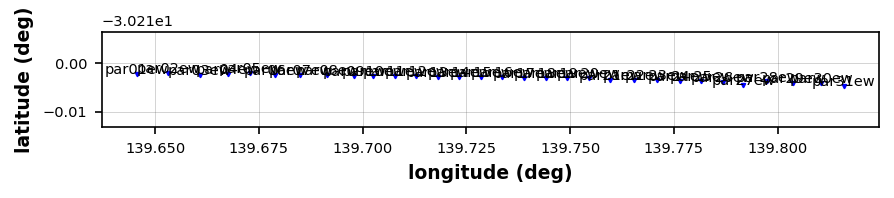

In [ ]:
# 3a) plot profile
plot_profile = profile.plot_stations()

In [ ]:
# 4) Interpolate data onto the same period map
# It is important to use bounds_error=False, which will put Nan where data cannot
# be interpolated.
profile.interpolate(np.logspace(-3, 3, 6), inplace=True, bounds_error=False)

In [ ]:
# 5) set data modeling errors, set an error floor of 5 % for the impedance
profile.z_model_error.error_value = 5
profile.z_model_error.error_type = "percent"
profile.z_model_error

Model Errors:
--------------------
	error_type:    percent
	error_value:   0.05
	floor:         True
	mode:          impedance

In [ ]:
profile.compute_model_errors()

## Run 2D inversion

Now use a somewhat standard recipe to invert the data.  User has lots of control of parameters for mesh building, inversion norms, smallness, etc.  This recipe is meant as a convenience object.  For advanced users and those who want to fully understand the Simpeg workflow should build their own recipe.

Here the input data is a Pandas Dataframe.  There is a method in MTData to create a Simpeg Data object.

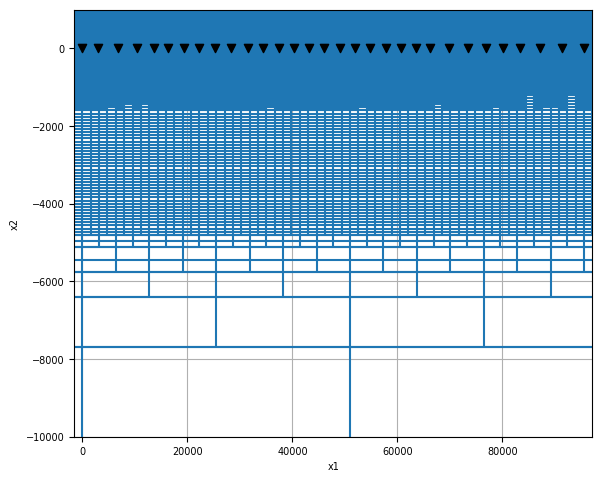

In [ ]:
simpeg_2d = Simpeg2D(profile.to_dataframe(), mesh_kwargs={})

In [ ]:
print(simpeg_2d)

Attributes
	air_conductivity: 1e-08
	alpha_s: 1e-05
	alpha_y: 0.2
	alpha_z: 1.0
	beta_cooling_factor: 2
	beta_cooling_rate: 1
	beta_starting_ratio: 1
	f_min_change: 1e-05
	initial_conductivity: 0.01
	max_iterations: 30
	max_iterations_cg: 30
	max_iterations_irls: 40
	minimum_gauss_newton_iterations: 1
	p_s: 0
	p_y: 0
	p_z: 0
	solver: pardiso
	target_misfit_chi_factor: 1
	use_irls: False
Properties


In [ ]:
simpeg_2d.data.n_stations

31